# Explore here

EDA realizado en proyecto anteriro de 4Geeks (Arbol de Desicion)

    https://github.com/LuisCamachoRivero/arboles_de_desicion

In [7]:
# Data

import pandas as pd

df = pd.read_csv('../data/processed/df_diabetes_eda.csv',sep=';')
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,5,116,74,25.6,0.201,30,0


In [8]:
# Division de conjuntos Train y Test

from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)


In [9]:
# Modelo y Entrenamiento

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

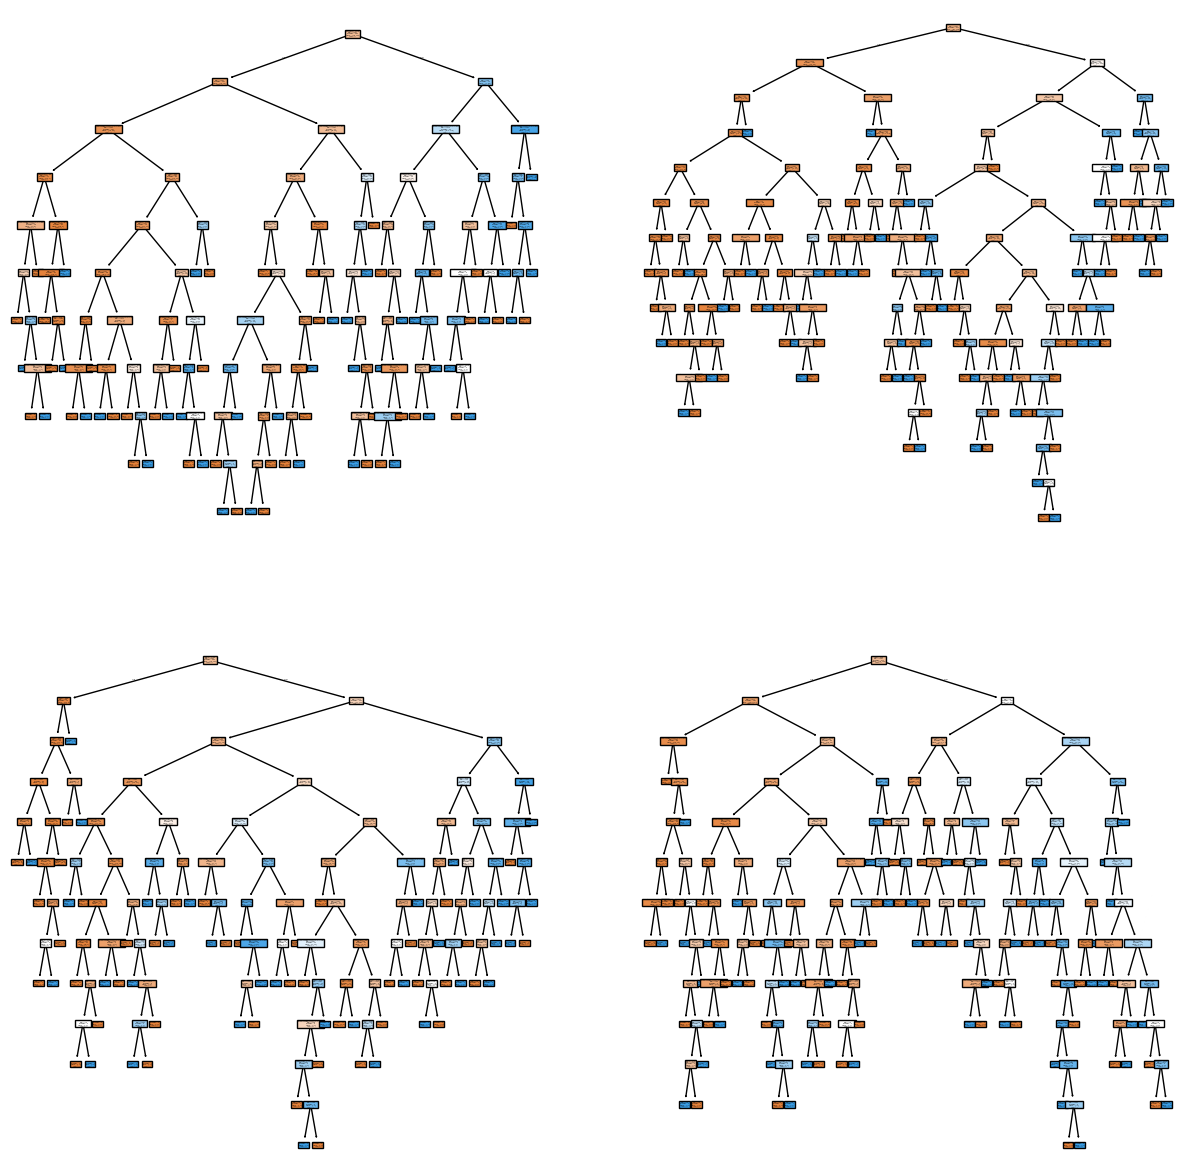

In [11]:
# Graficamos los 4 primeros arboles para observar sus comportamientos

import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [ ]:
# Predicciones

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [13]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score: {accuracy_score(y_pred,y_test)}')

Accuracy Score: 0.8145161290322581


In [42]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators' : [10,20,30,50,70,100,120,150,200],
    'bootstrap' : [True,False],
    'max_depth' : [None,5,7,10],
    
}

grid_result = GridSearchCV(model,grid,scoring='accuracy',cv=5)

grid_result.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 7, 10],
                         'n_estimators': [10, 20, 30, 50, 70, 100, 120, 150,
                                          200]},
             scoring='accuracy')

In [43]:
best_model = grid_result.best_estimator_

y_best_pred = best_model.predict(X_test)

In [44]:
print (f'Accuracy Score Best Model: {accuracy_score(y_best_pred,y_test)}')

Accuracy Score Best Model: 0.7662337662337663
